In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('gold.csv')

In [40]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [41]:
df.shape

(2290, 6)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [43]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

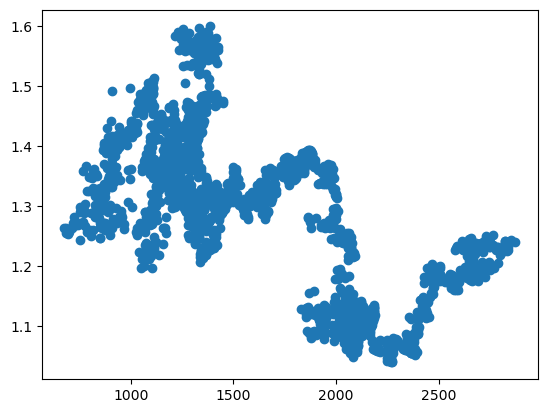

In [44]:
plt.scatter(df['SPX'], df['EUR/USD'])

C:\Users\manit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


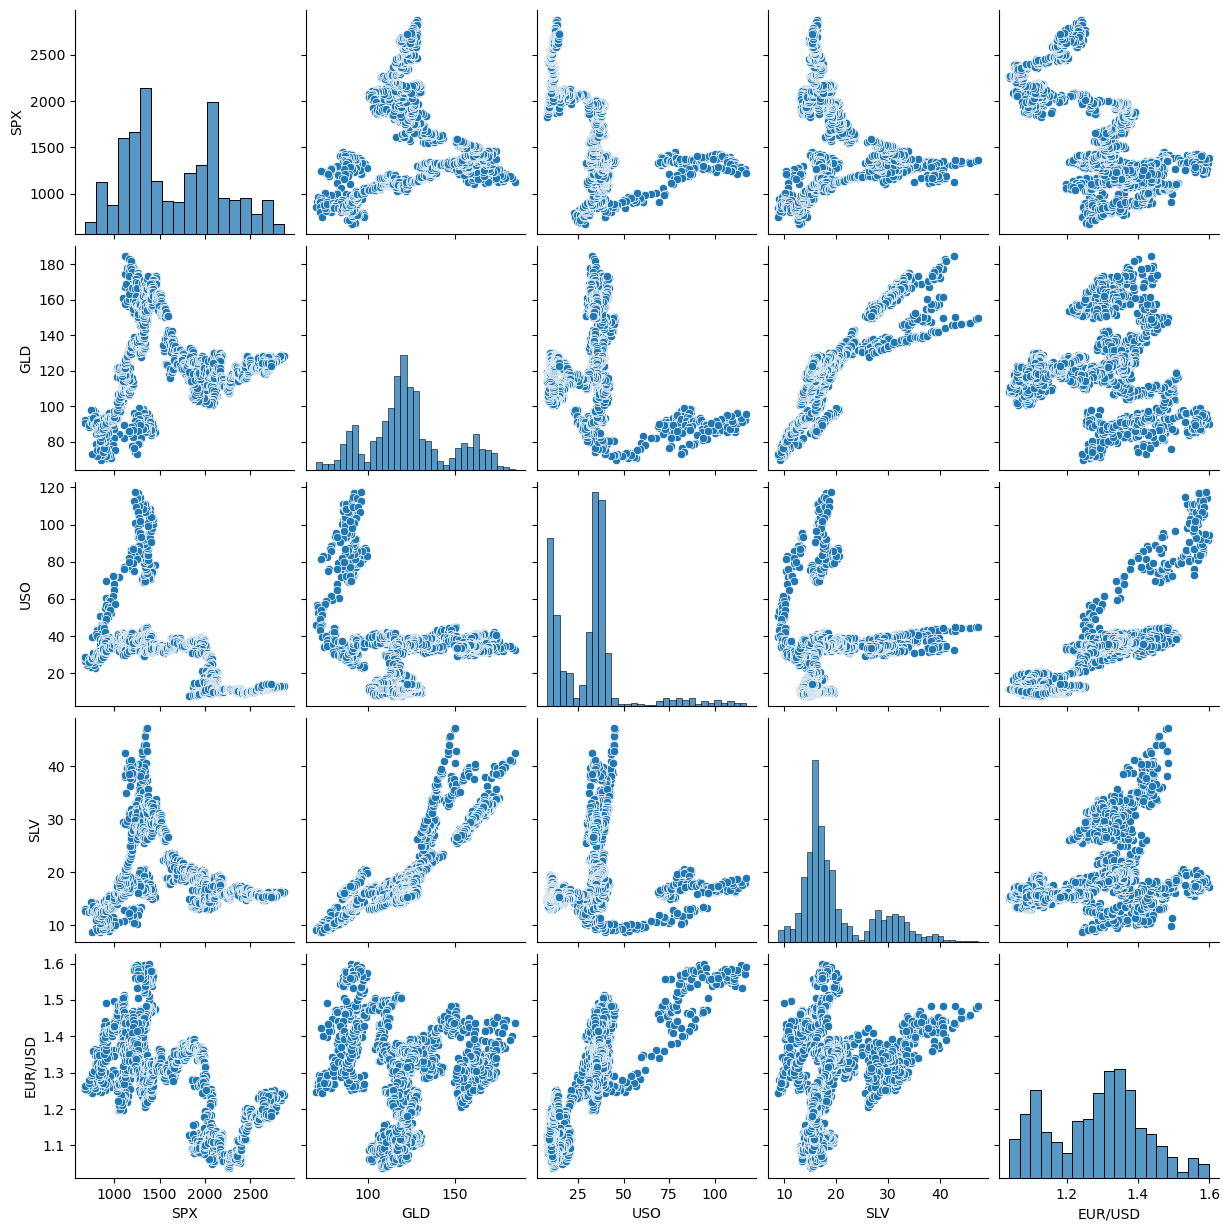

In [45]:
sns.pairplot(df)

C:\Users\manit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


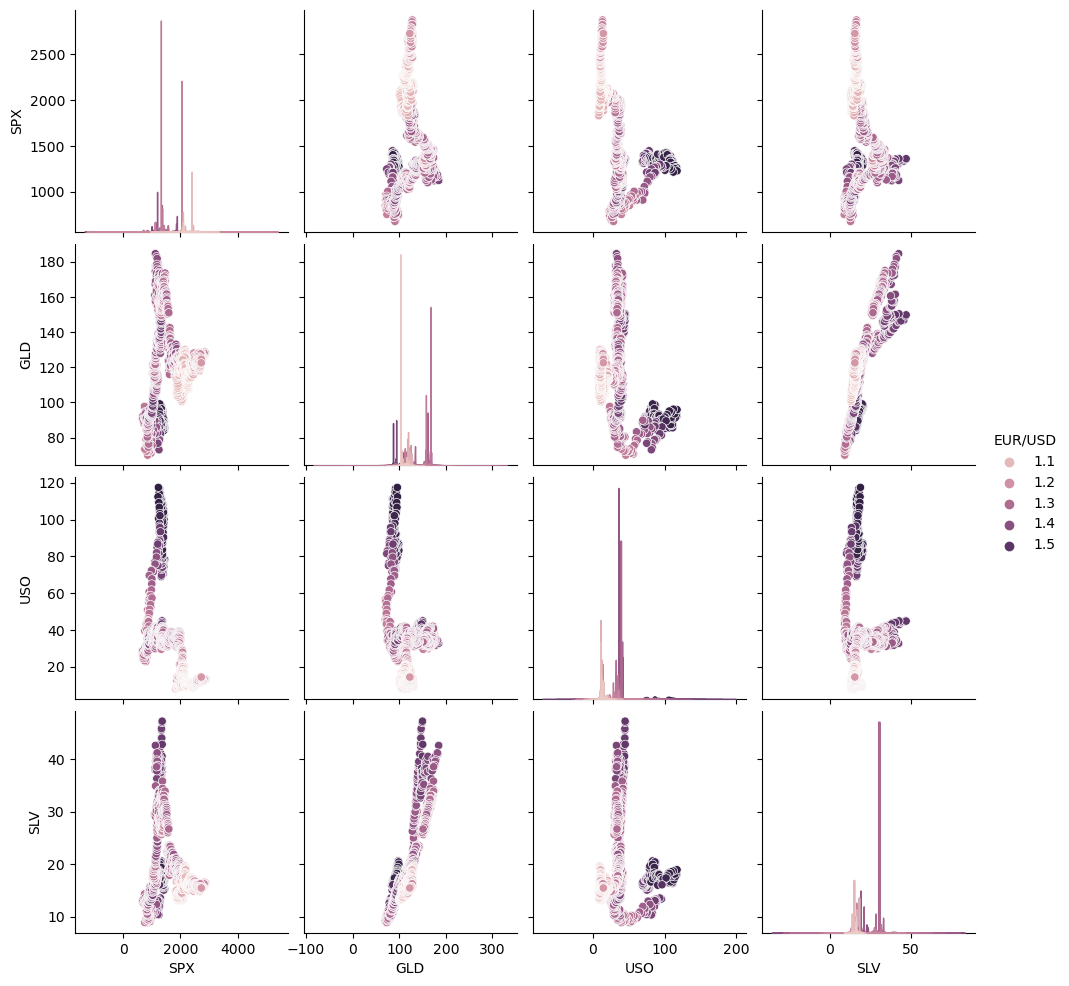

In [46]:
sns.pairplot(df, hue = "EUR/USD")

In [47]:
df['Date1'] = pd.to_datetime(df['Date'])

In [48]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Date1
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,2008-01-02
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,2008-01-03
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,2008-01-04
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,2008-01-07
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,2008-01-08


In [49]:
df['Day'] = df['Date1'].dt.day
df['Month'] = df['Date1'].dt.month
df['year'] = df['Date1'].dt.year

In [50]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Date1,Day,Month,year
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,2008-01-02,2,1,2008
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,2008-01-03,3,1,2008
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,2008-01-04,4,1,2008
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,2008-01-07,7,1,2008
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,2008-01-08,8,1,2008


In [51]:
df = df.drop(columns = ['Date', 'Date1'])

In [52]:
x = df.drop("EUR/USD", axis = 1)

In [53]:
y = df['EUR/USD']

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44)

In [60]:
x_train_scaled = scaler.fit_transform(x_train)

In [61]:
x_test_scaled = scaler.transform(x_test)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [65]:
model = LinearRegression()

In [89]:
poly = PolynomialFeatures(degree = 5)

In [90]:
x_train_poly = poly.fit_transform(x_train_scaled)

In [91]:
x_test_poly = poly.transform(x_test_scaled)

In [92]:
model.fit(x_train_poly, y_train)

LinearRegression()

In [93]:
y_pred = model.predict(x_test_poly)

In [94]:
from sklearn.metrics import accuracy_score, r2_score

In [95]:
r2_score(y_pred, y_test)

0.9460166614880033